<a href="https://colab.research.google.com/github/DeepaliVerma/personal_files/blob/main/keras_change_pretrained_input_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input,decode_predictions
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import numpy as np

model = ResNet50(weights='imagenet',include_top=False,input_shape=(320, 320,3))

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 326, 326, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 160, 160, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 160, 160, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#https://stackoverflow.com/questions/42187425/how-to-change-input-shape-in-sequential-model-in-keras
import tensorflow.keras
import numpy as np
import tensorflow as tf

tf.keras.backend.clear_session()

  
def change_model(model, new_input_shape=(None, 40, 40, 3),custom_objects=None):
    # replace input shape of first layer
    
    config = model.layers[0].get_config()
    config['batch_input_shape']=new_input_shape
    model._layers[0]=model.layers[0].from_config(config)

    # rebuild model architecture by exporting and importing via json
    new_model = tensorflow.keras.models.model_from_json(model.to_json(),custom_objects=custom_objects)

    # copy weights from old model to new one
    for layer in new_model._layers:
        try:
            layer.set_weights(model.get_layer(name=layer.name).get_weights())
            print("Loaded layer {}".format(layer.name))
        except:
            print("Could not transfer weights for layer {}".format(layer.name))

    return new_model
  

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input,decode_predictions
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import numpy as np

model = MobileNet(weights='imagenet',include_top=True,input_shape=(224, 224,3))

new_model = change_model(model, new_input_shape=[None] + [130,130,3])
new_model.summary()


Loaded layer input_1
Loaded layer conv1_pad
Loaded layer conv1
Loaded layer conv1_bn
Loaded layer conv1_relu
Loaded layer conv_dw_1
Loaded layer conv_dw_1_bn
Loaded layer conv_dw_1_relu
Loaded layer conv_pw_1
Loaded layer conv_pw_1_bn
Loaded layer conv_pw_1_relu
Loaded layer conv_pad_2
Loaded layer conv_dw_2
Loaded layer conv_dw_2_bn
Loaded layer conv_dw_2_relu
Loaded layer conv_pw_2
Loaded layer conv_pw_2_bn
Loaded layer conv_pw_2_relu
Loaded layer conv_dw_3
Loaded layer conv_dw_3_bn
Loaded layer conv_dw_3_relu
Loaded layer conv_pw_3
Loaded layer conv_pw_3_bn
Loaded layer conv_pw_3_relu
Loaded layer conv_pad_4
Loaded layer conv_dw_4
Loaded layer conv_dw_4_bn
Loaded layer conv_dw_4_relu
Loaded layer conv_pw_4
Loaded layer conv_pw_4_bn
Loaded layer conv_pw_4_relu
Loaded layer conv_dw_5
Loaded layer conv_dw_5_bn
Loaded layer conv_dw_5_relu
Loaded layer conv_pw_5
Loaded layer conv_pw_5_bn
Loaded layer conv_pw_5_relu
Loaded layer conv_pad_6
Loaded layer conv_dw_6
Loaded layer conv_dw_6_bn


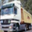

(130, 130, 3)


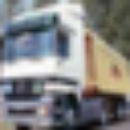

Predicted: [('n03796401', 'moving_van', 0.99184096), ('n04467665', 'trailer_truck', 0.008150891), ('n03417042', 'garbage_truck', 2.1302458e-06)]


In [ ]:
from tensorflow.keras.datasets import cifar10
import cv2
import random
from google.colab.patches import cv2_imshow

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

ind=1
img = x_train[ind]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


cv2_imshow(img)
img = cv2.resize(img,(130, 130))

print(img.shape)
cv2_imshow(img)

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

preds = new_model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])